# Price Cut Combined Decision Tree

### Data Cleanup

The following property types were eliminated from the original CSV:
1. Lot/Land

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

In [2]:
# Name of the CSV file
file_path = Path("Resources/For_Sale_Data_Combined.csv")
df = pd.read_csv(file_path)
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/93-N-Cooper...,NaN,Apartment for sale,Apartment,NaN,289000.0,No,NaN,NaN,1075.0,...,2.0,2.0,RE/MAX Solutions,NaN,93 N Cooper Rd UNIT 29,Chandler,85225,AZ,USA,5.33
1,https://www.zillow.com/homedetails/295-N-Rural...,NaN,Apartment for sale,Apartment,5.0,389999.0,No,NaN,NaN,1069.0,...,2.0,2.0,RE/MAX Alliance Group,NaN,295 N Rural Rd UNIT 155,Chandler,85226,AZ,USA,5.33
2,https://www.zillow.com/homedetails/1351-N-Plea...,NaN,Apartment for sale,Apartment,4.0,398000.0,No,NaN,NaN,1480.0,...,3.0,2.0,DeLex Realty,NaN,1351 N Pleasant Dr UNIT 1098,Chandler,85225,AZ,USA,5.33
3,https://www.zillow.com/homedetails/1075-E-Chan...,NaN,Apartment for sale,Apartment,15.0,225000.0,No,NaN,NaN,705.0,...,1.0,1.0,DPR Realty LLC,NaN,1075 E Chandler Blvd UNIT 119,Chandler,85225,AZ,USA,5.33
4,https://www.zillow.com/homedetails/295-N-Rural...,NaN,Apartment for sale,Apartment,NaN,299900.0,Yes,35100.0,02/13/2024,979.0,...,1.0,1.0,Arizona Elite Properties,NaN,295 N Rural Rd UNIT 138,Chandler,85226,AZ,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,https://www.zillow.com/homedetails/8812-SE-Rur...,NaN,Active,Unknown,234.0,429000.0,Yes,6000.0,07/25/2023,1270.0,...,3.0,2.0,Sundance Realty LLC,NaN,8812 SE Rural St,Portland,97266,OR,USA,5.33
1681,https://www.zillow.com/homedetails/5421-NE-Kil...,NaN,Active,Unknown,8.0,1000000.0,No,NaN,NaN,3328.0,...,8.0,4.0,Branch Real Estate,NaN,5421 NE Killingsworth St,Portland,97218,OR,USA,5.33
1682,https://www.zillow.com/homedetails/1333-N-Albe...,NaN,Active,Unknown,8.0,585000.0,No,NaN,NaN,1850.0,...,2.0,2.0,"Change Realty, LLC",NaN,1333 N Alberta St,Portland,97217,OR,USA,5.33
1683,https://www.zillow.com/homedetails/1524-NE-Mar...,NaN,Active,Unknown,9.0,599000.0,No,NaN,NaN,2273.0,...,2.0,2.0,John L. Scott Portland South,NaN,1524 NE Marine Dr,Portland,97211,OR,USA,5.33


In [3]:
# Clean the dataframe by replacing NaN values with 0
df.fillna(0, inplace=True)

In [4]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/93-N-Cooper...,0.0,Apartment for sale,Apartment,0.0,289000.0,No,0.0,0,1075.0,...,2.0,2.0,RE/MAX Solutions,0,93 N Cooper Rd UNIT 29,Chandler,85225,AZ,USA,5.33
1,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,5.0,389999.0,No,0.0,0,1069.0,...,2.0,2.0,RE/MAX Alliance Group,0,295 N Rural Rd UNIT 155,Chandler,85226,AZ,USA,5.33
2,https://www.zillow.com/homedetails/1351-N-Plea...,0.0,Apartment for sale,Apartment,4.0,398000.0,No,0.0,0,1480.0,...,3.0,2.0,DeLex Realty,0,1351 N Pleasant Dr UNIT 1098,Chandler,85225,AZ,USA,5.33
3,https://www.zillow.com/homedetails/1075-E-Chan...,0.0,Apartment for sale,Apartment,15.0,225000.0,No,0.0,0,705.0,...,1.0,1.0,DPR Realty LLC,0,1075 E Chandler Blvd UNIT 119,Chandler,85225,AZ,USA,5.33
4,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,0.0,299900.0,Yes,35100.0,02/13/2024,979.0,...,1.0,1.0,Arizona Elite Properties,0,295 N Rural Rd UNIT 138,Chandler,85226,AZ,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,https://www.zillow.com/homedetails/8812-SE-Rur...,0.0,Active,Unknown,234.0,429000.0,Yes,6000.0,07/25/2023,1270.0,...,3.0,2.0,Sundance Realty LLC,0,8812 SE Rural St,Portland,97266,OR,USA,5.33
1681,https://www.zillow.com/homedetails/5421-NE-Kil...,0.0,Active,Unknown,8.0,1000000.0,No,0.0,0,3328.0,...,8.0,4.0,Branch Real Estate,0,5421 NE Killingsworth St,Portland,97218,OR,USA,5.33
1682,https://www.zillow.com/homedetails/1333-N-Albe...,0.0,Active,Unknown,8.0,585000.0,No,0.0,0,1850.0,...,2.0,2.0,"Change Realty, LLC",0,1333 N Alberta St,Portland,97217,OR,USA,5.33
1683,https://www.zillow.com/homedetails/1524-NE-Mar...,0.0,Active,Unknown,9.0,599000.0,No,0.0,0,2273.0,...,2.0,2.0,John L. Scott Portland South,0,1524 NE Marine Dr,Portland,97211,OR,USA,5.33


In [5]:
# Import scikit-learn libraries including Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
# Convert 'Price was cut' to a binary indicator (0 and 1)
df['Price was cut'] = df['Price was cut'].apply(lambda x: 1 if x == 'Yes' else 0)
df.tail()

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
1680,https://www.zillow.com/homedetails/8812-SE-Rur...,0.0,Active,Unknown,234.0,429000.0,1,6000.0,07/25/2023,1270.0,...,3.0,2.0,Sundance Realty LLC,0,8812 SE Rural St,Portland,97266,OR,USA,5.33
1681,https://www.zillow.com/homedetails/5421-NE-Kil...,0.0,Active,Unknown,8.0,1000000.0,0,0.0,0,3328.0,...,8.0,4.0,Branch Real Estate,0,5421 NE Killingsworth St,Portland,97218,OR,USA,5.33
1682,https://www.zillow.com/homedetails/1333-N-Albe...,0.0,Active,Unknown,8.0,585000.0,0,0.0,0,1850.0,...,2.0,2.0,"Change Realty, LLC",0,1333 N Alberta St,Portland,97217,OR,USA,5.33
1683,https://www.zillow.com/homedetails/1524-NE-Mar...,0.0,Active,Unknown,9.0,599000.0,0,0.0,0,2273.0,...,2.0,2.0,John L. Scott Portland South,0,1524 NE Marine Dr,Portland,97211,OR,USA,5.33
1684,https://www.zillow.com/homedetails/15061-NW-Eu...,0.0,Active,Unknown,0.0,1150000.0,1,450000.0,01/25/2024,3276.0,...,5.0,4.0,Keller Williams Sunset Corridor,0,15061 NW Eugene Ln,Portland,97229,OR,USA,5.33


In [7]:
# Feature selection
# Selecting relevant features and the target variable
X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]
#X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City']]
#X = df[['Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]
y = df['Price was cut']
#y = df['Property price (USD)']

In [8]:
# Handle the categorical variables
categorical_features = ['Property type', 'City']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X.loc[:,col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [9]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/93-N-Cooper...,0.0,Apartment for sale,Apartment,0.0,289000.0,0,0.0,0,1075.0,...,2.0,2.0,RE/MAX Solutions,0,93 N Cooper Rd UNIT 29,Chandler,85225,AZ,USA,5.33
1,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,5.0,389999.0,0,0.0,0,1069.0,...,2.0,2.0,RE/MAX Alliance Group,0,295 N Rural Rd UNIT 155,Chandler,85226,AZ,USA,5.33
2,https://www.zillow.com/homedetails/1351-N-Plea...,0.0,Apartment for sale,Apartment,4.0,398000.0,0,0.0,0,1480.0,...,3.0,2.0,DeLex Realty,0,1351 N Pleasant Dr UNIT 1098,Chandler,85225,AZ,USA,5.33
3,https://www.zillow.com/homedetails/1075-E-Chan...,0.0,Apartment for sale,Apartment,15.0,225000.0,0,0.0,0,705.0,...,1.0,1.0,DPR Realty LLC,0,1075 E Chandler Blvd UNIT 119,Chandler,85225,AZ,USA,5.33
4,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,0.0,299900.0,1,35100.0,02/13/2024,979.0,...,1.0,1.0,Arizona Elite Properties,0,295 N Rural Rd UNIT 138,Chandler,85226,AZ,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,https://www.zillow.com/homedetails/8812-SE-Rur...,0.0,Active,Unknown,234.0,429000.0,1,6000.0,07/25/2023,1270.0,...,3.0,2.0,Sundance Realty LLC,0,8812 SE Rural St,Portland,97266,OR,USA,5.33
1681,https://www.zillow.com/homedetails/5421-NE-Kil...,0.0,Active,Unknown,8.0,1000000.0,0,0.0,0,3328.0,...,8.0,4.0,Branch Real Estate,0,5421 NE Killingsworth St,Portland,97218,OR,USA,5.33
1682,https://www.zillow.com/homedetails/1333-N-Albe...,0.0,Active,Unknown,8.0,585000.0,0,0.0,0,1850.0,...,2.0,2.0,"Change Realty, LLC",0,1333 N Alberta St,Portland,97217,OR,USA,5.33
1683,https://www.zillow.com/homedetails/1524-NE-Mar...,0.0,Active,Unknown,9.0,599000.0,0,0.0,0,2273.0,...,2.0,2.0,John L. Scott Portland South,0,1524 NE Marine Dr,Portland,97211,OR,USA,5.33


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = clf.predict(X_test)


In [13]:
# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5400593471810089
Confusion Matrix:
 [[139  83]
 [ 72  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64       222
           1       0.34      0.37      0.36       115

    accuracy                           0.54       337
   macro avg       0.50      0.50      0.50       337
weighted avg       0.55      0.54      0.54       337



# Initial Result of the Decision Tree Model

### Accuracy Score
The accuracy score of 0.54 (or 54%) indicates that the model correctly predicts the outcome (whether the price will be cut or not) in approximately 54% of the cases. This metric provides a general idea of the model's overall performance but doesn't detail its effectiveness in distinguishing between the two classes.



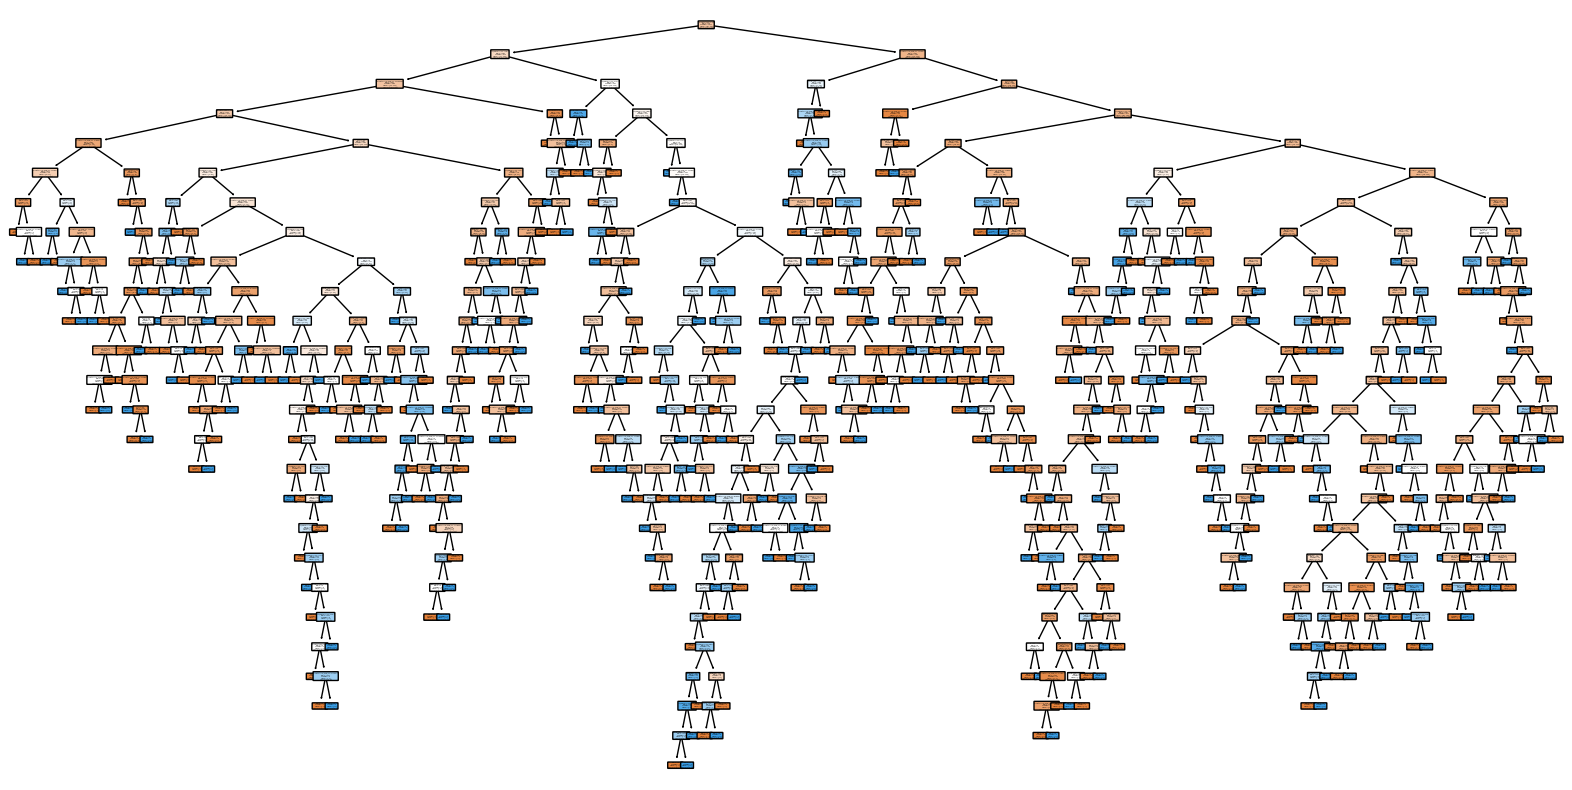

In [14]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, class_names=["No Price Cut", "Price Cut"], feature_names=X.columns)
plt.show()
